In [2]:
import pandas as pd
import matplotlib.pylab as plt


years = [2020, 2021, 2022, 2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]
all_years = []
for x in range(6):
    all_years.append(years)
flat_list = []
for sublist in all_years:
    for item in sublist:
        flat_list.append(item)       
projections = pd.read_csv('all_projected_results.csv')
projections.insert(0, 'Year', flat_list)
projections = projections.rename(columns={'Predicted Value': 'Projected Yield (Bushels/Acre)'})
projections

,Year,Model,Projected Yield (Bushels/Acre),Average Annual Percent Change
0,2020,Simple,51.082144,1.012003
1,2021,Simple,51.772890,1.012003
2,2022,Simple,52.286042,1.012003
3,2023,Simple,52.829027,1.012003
4,2024,Simple,53.346386,1.012003
...,...,...,...,...
61,2026,ElasticNet 0.75,56.316610,1.433264
62,2027,ElasticNet 0.75,56.995818,1.433264
63,2028,ElasticNet 0.75,57.675128,1.433264
64,2029,ElasticNet 0.75,58.638844,1.433264


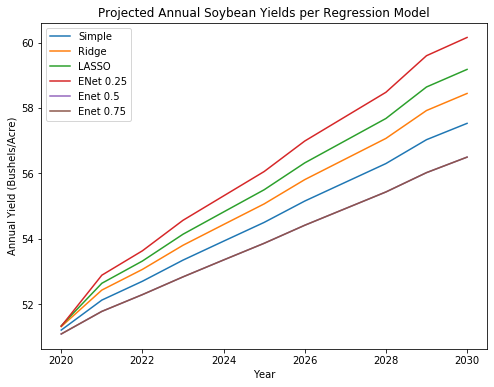

In [22]:
fig, ax = plt.subplots(figsize=(8,6))
projections.groupby('Model').plot(kind='line',x='Year',y = "Projected Yield (Bushels/Acre)", ax=ax)
plt.legend(['Simple', 'Ridge', 'LASSO', 'ENet 0.25', 'Enet 0.5', 'Enet 0.75'])
plt.title('Projected Annual Soybean Yields per Regression Model')
plt.ylabel('Annual Yield (Bushels/Acre)')
plt.savefig('phase2projections.png')
plt.show()

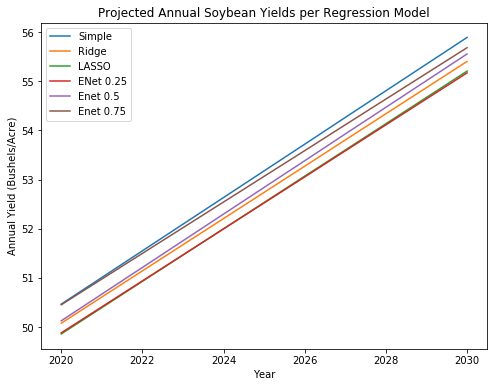

In [23]:
import numpy as np
projections2 = pd.read_csv('phase1yields_new.csv')
fig, ax = plt.subplots(figsize=(8,6))
projections2.groupby('Model').plot(kind='line',x='Year',y = "Projected", ax=ax)
plt.legend(['Simple', 'Ridge', 'LASSO', 'ENet 0.25', 'Enet 0.5', 'Enet 0.75'])
plt.title('Projected Annual Soybean Yields per Regression Model')
plt.ylabel('Annual Yield (Bushels/Acre)')
plt.savefig('phase1projections.png')
plt.show()

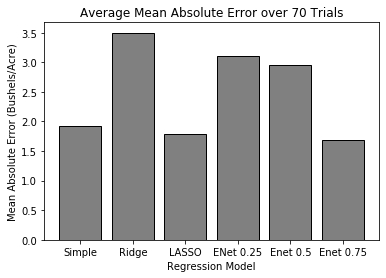

In [8]:
mae_phase_2 = [1.93, 3.50, 1.78, 3.11, 2.96, 1.69]
models = ['Simple', 'Ridge', 'LASSO', 'ENet 0.25', 'Enet 0.5', 'Enet 0.75']
plt.bar(models, mae_phase_2, color='gray', edgecolor='black')
plt.title('Average Mean Absolute Error over 70 Trials')
plt.ylabel('Mean Absolute Error (Bushels/Acre)')
plt.xlabel('Regression Model')
plt.savefig('avg_errors_phase2.png', bbox_inches='tight')

In [25]:
avg_errors = avg_errors.drop(['Mean Absolute Error', 'Actual', 'Predicted'], axis=1)
avg_errors.to_csv('avg_errors_phase_2.csv', index=False)

In [94]:
projections_new = projections.sort_values(['Year', 'Model'])
projections_new.to_csv('projections_new.csv', index=False)

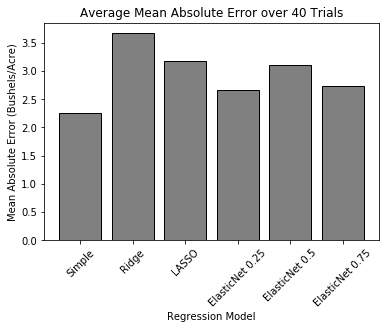

In [3]:
models = ['Simple', 'Ridge', 'LASSO', 'ElasticNet 0.25', 'ElasticNet 0.5', 'ElasticNet 0.75']
errors1 = [2.25, 3.67, 3.18, 2.67, 3.11, 2.74]

plt.bar(models, errors1, color = 'gray', edgecolor='black')
plt.title('Average Mean Absolute Error over 40 Trials')
plt.ylabel('Mean Absolute Error (Bushels/Acre)')
plt.xlabel('Regression Model')
plt.xticks(rotation=45)
plt.savefig('avg_errors_phase1.png', bbox_inches='tight')

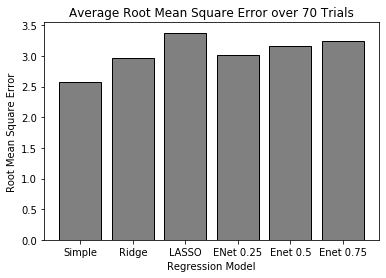

In [5]:
rmse_phase_2 = [2.58,  2.96, 3.38, 3.01, 3.17, 3.25]
models = ['Simple', 'Ridge', 'LASSO', 'ENet 0.25', 'Enet 0.5', 'Enet 0.75']
plt.bar(models, rmse_phase_2, color='gray', edgecolor='black')
plt.title('Average Root Mean Square Error over 70 Trials')
plt.xlabel('Regression Model')
plt.ylabel('Root Mean Square Error')
plt.savefig('avg_rmse_phase2.png', bbox_inches='tight')

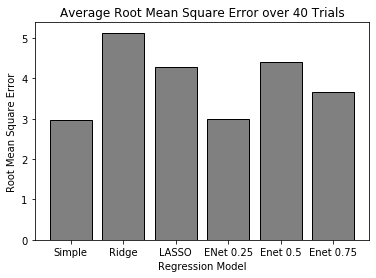

In [6]:
rmse_phase_1 = [2.97, 5.13, 4.29, 3.00, 4.41, 3.66]

models = ['Simple', 'Ridge', 'LASSO', 'ENet 0.25', 'Enet 0.5', 'Enet 0.75']
plt.bar(models, rmse_phase_1, color='gray', edgecolor='black')
plt.title('Average Root Mean Square Error over 40 Trials')
plt.xlabel('Regression Model')
plt.ylabel('Root Mean Square Error')
plt.savefig('avg_rmse_phase1.png', bbox_inches='tight')

In [45]:
import statistics
projections = pd.read_csv('all_projected_results.csv')
statistics.variance(projections['Predicted Value'])

5.32323762753176

In [48]:
projections2 = pd.read_csv('phase1yields_new.csv')
statistics.variance(projections2['Projected'])

2.9617723664114464